<a href="https://colab.research.google.com/github/sahiltambe18/DL_CLG/blob/main/LAB3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# a. Loading and preprocessing the image data
def load_and_preprocess_data():
    (train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

    # Normalize pixel values to be between 0 and 1
    train_images, test_images = train_images / 255.0, test_images / 255.0

    class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
                   'dog', 'frog', 'horse', 'ship', 'truck']

    return (train_images, train_labels), (test_images, test_labels), class_names


In [3]:
# b. Defining the model's architecture
def create_model():
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(10)
    ])

    model.compile(optimizer='adam',
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])

    return model

In [4]:
# c. Training the model
def train_model(model, train_images, train_labels):
    history = model.fit(train_images, train_labels, epochs=10,
                        validation_split=0.2, verbose=1)
    return history


In [5]:
# d. Estimating the model's performance
def evaluate_model(model, test_images, test_labels, class_names):
    test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
    print(f'\nTest accuracy: {test_acc:.4f}')

    # Make predictions
    probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])
    predictions = probability_model.predict(test_images)

    # Plot some predictions
    num_rows = 5
    num_cols = 3
    num_images = num_rows * num_cols
    plt.figure(figsize=(2*2*num_cols, 2*num_rows))
    for i in range(num_images):
        plt.subplot(num_rows, 2*num_cols, 2*i+1)
        plot_image(i, predictions[i], test_labels, test_images, class_names)
        plt.subplot(num_rows, 2*num_cols, 2*i+2)
        plot_value_array(i, predictions[i], test_labels)
    plt.tight_layout()
    plt.show()

In [6]:
def plot_image(i, predictions_array, true_label, img, class_names):
    true_label, img = true_label[i][0], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel(f"{class_names[predicted_label]} {100*np.max(predictions_array):2.0f}% "
               f"({class_names[true_label]})", color=color)


In [7]:
def plot_value_array(i, predictions_array, true_label):
    true_label = true_label[i][0]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.3326 - loss: 1.7950 - val_accuracy: 0.5170 - val_loss: 1.3398
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.5492 - loss: 1.2607 - val_accuracy: 0.6070 - val_loss: 1.1147
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.6304 - loss: 1.0522 - val_accuracy: 0.6323 - val_loss: 1.0445
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6757 - loss: 0.9314 - val_accuracy: 0.6684 - val_loss: 0.9400
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.7071 - loss: 0.8344 - val_accuracy: 0.6934 - val_loss: 0.8840
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7361 - loss: 0.7601 - val_accuracy: 0.6909 - val_loss: 0.8879
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7553 - loss: 0.7034 - val_accuracy: 0.6948 - val_loss: 0.8946
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7749 - loss: 0.6436 -

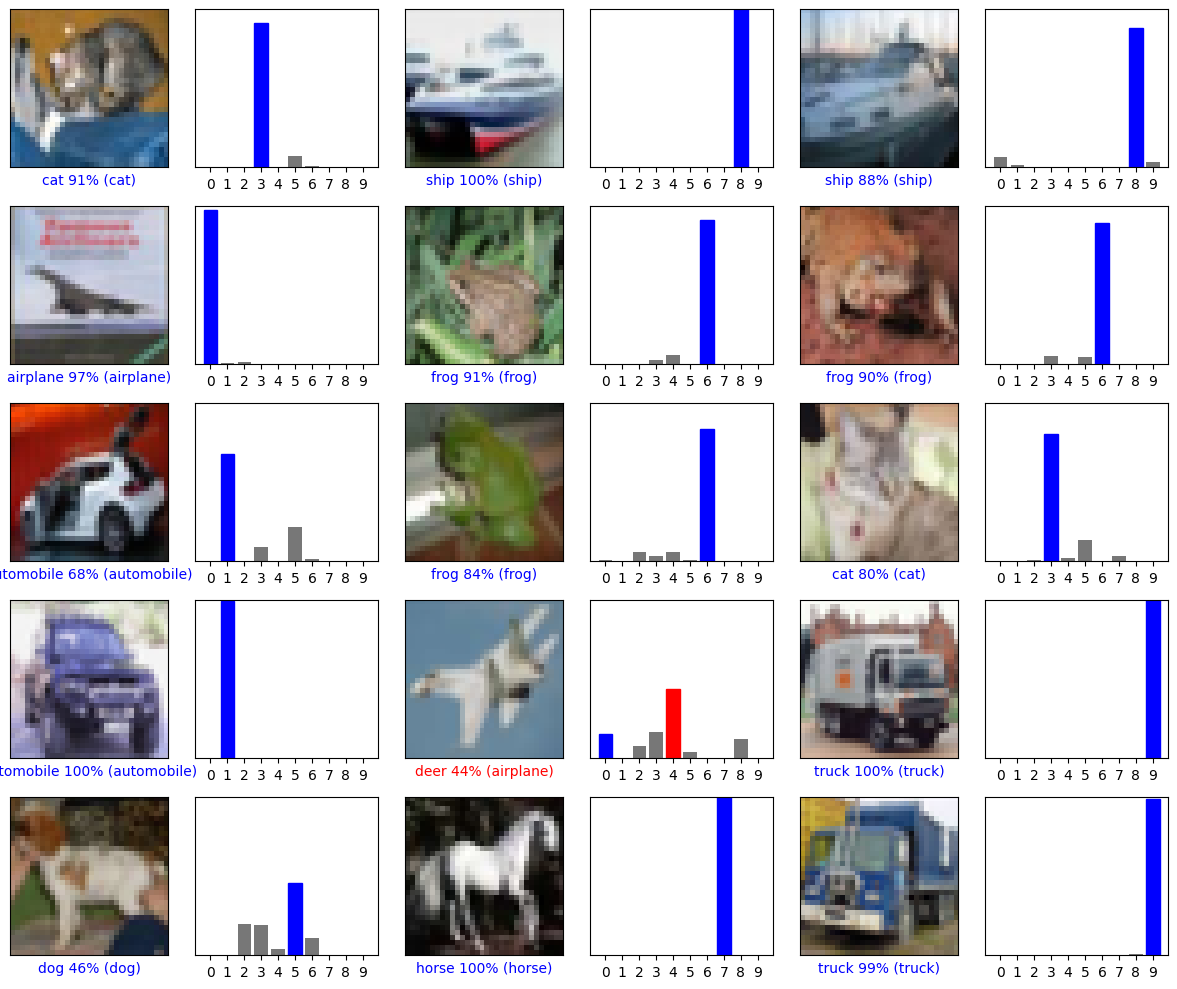

In [8]:
# Main execution
if __name__ == "__main__":
    # a. Load and preprocess data
    (train_images, train_labels), (test_images, test_labels), class_names = load_and_preprocess_data()

    # b. Create model
    model = create_model()

    # c. Train model
    history = train_model(model, train_images, train_labels)

    # d. Evaluate model
    evaluate_model(model, test_images, test_labels, class_names)


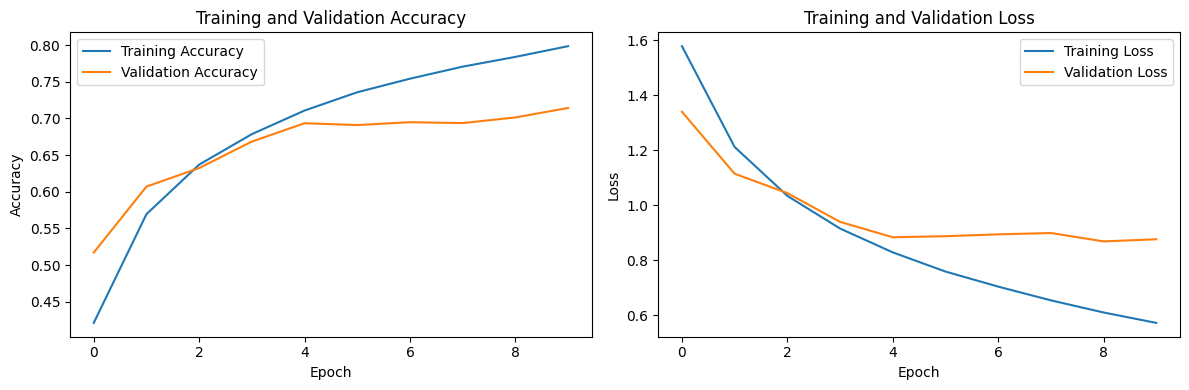

In [9]:

    # Plot training history
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()